# Train

In [1]:
from allNew import *


mod = Model(np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]]), np.array([1, 2, 3]), 15)
adamOpt = Adam(mod.copy(), h=0.08, tol=1e-5, maxiter=4*1e3)

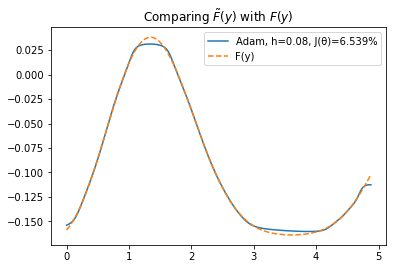

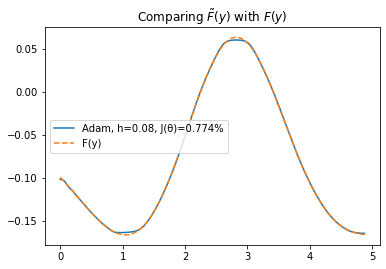

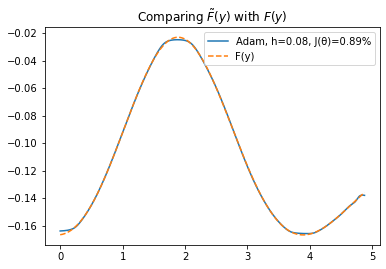

Trainin time: 0:00:45.070633
4001


In [3]:
batchFrom = 0
batchTo = 2
dataPointsFrom = 0
dataPointsTo = 1000
train(adamOpt, batchFrom, batchTo, dataPointsFrom, dataPointsTo, inp='Q', output='V')
print(adamOpt.M.j)

# Test

In [4]:
def testOnNew(Y, C, t, m):
    Z = Y.copy()
    θ = m.M.θ

    for k in range(m.M.K):
        Z = (Z + m.M.h * σ(θ['W'][k] @ Z + θ['b'][k]))
    print('Z:', np.min(Z), np.max(Z), Z.shape)
    t1 = Z.T @ θ['w'] + θ['μ']
    print('t1', np.min(t1), np.max(t1), t1.shape)
    Υ = η(Z.T @ θ['w'] + θ['μ']).T[0]
    
    
    print('Υ:', np.min(Υ), np.max(Υ), Υ.shape)
    Jθ = 0.5*np.linalg.norm(Υ - scale(C))**2
    
    plt.title(r'Trained on new input with $J(\theta) = {}\%$'.format(round(Jθ*100, 2)))
    plt.plot(t, Υ, label=r'$\tilde{F}(y)$')
    plt.plot(t, scale(C), ls='--')
    plt.legend()
    plt.show()



testBatch = generate_data(30)
Y0test = np.array(testBatch['Q'][:, dataPointsFrom:dataPointsTo])
print(Y0test.shape)
Ctest = testBatch['V'][dataPointsFrom:dataPointsTo]
print(Ctest.shape)
ttest = testBatch['t'][dataPointsFrom:dataPointsTo]
print(ttest.shape)

(3, 1000)
(1000,)
(1000,)


Z: -1.943293324722875 1.6822681795687955 (3, 1000)
t1 -3.390971651599722 7.06821072143933 (1000, 1)
Υ: 0.032578817425222895 0.9991489690956166 (1000,)


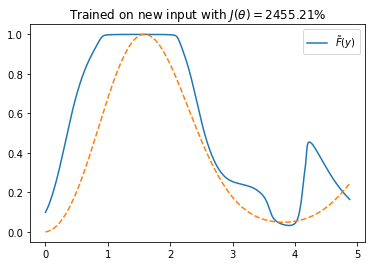

In [5]:
testOnNew(Y0test, Ctest, ttest, adamOpt)

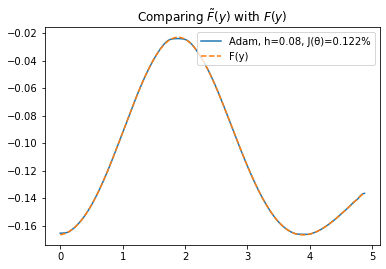

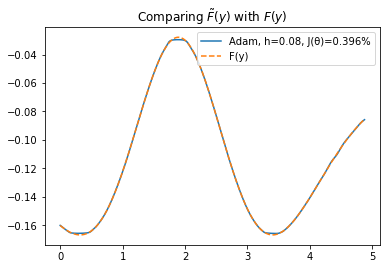

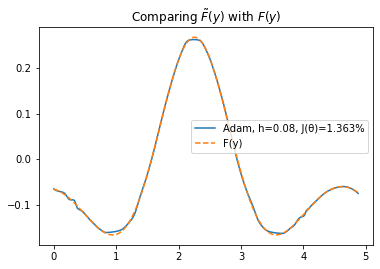

Trainin time: 0:00:46.670933


In [6]:
train(adamOpt, 2, 4, dataPointsFrom, dataPointsTo, inp='Q', output='V')

Z: -1.9422938133494383 1.6991703637384452 (3, 1000)
t1 -4.999309424886475 -0.6834279870856794 (1000, 1)
Υ: 0.006697443471115394 0.3354966413442728 (1000,)


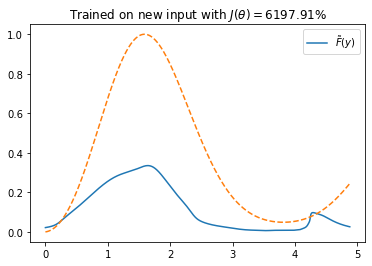

In [7]:
testOnNew(Y0test, Ctest, ttest, adamOpt)

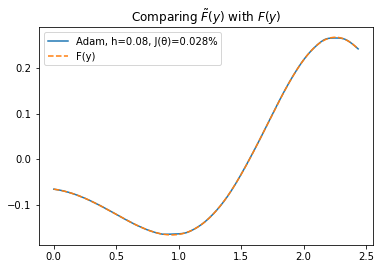

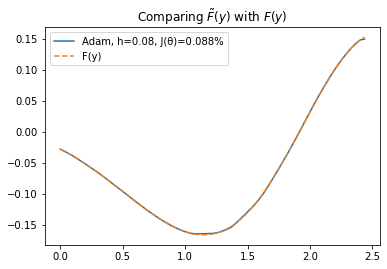

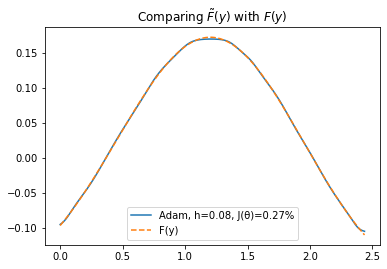

Trainin time: 0:00:31.080566


In [8]:

train(adamOpt, 4, 6, 0, 500, inp='Q', output='V')

Z: -1.9423422305743057 1.6017277397648193 (3, 1000)
t1 -6.99615797160303 10.381277281288707 (1000, 1)
Υ: 0.0009145550043164197 0.9999689933322667 (1000,)


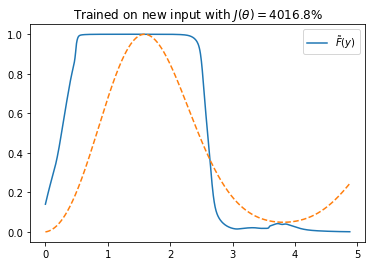

In [9]:
testOnNew(Y0test, Ctest, ttest, adamOpt)

4001


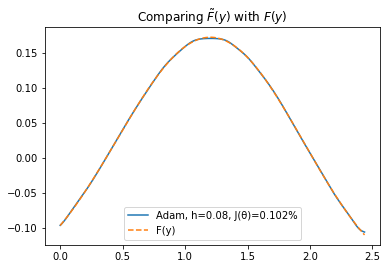

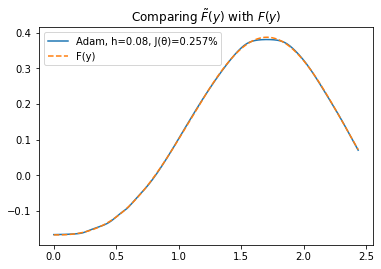

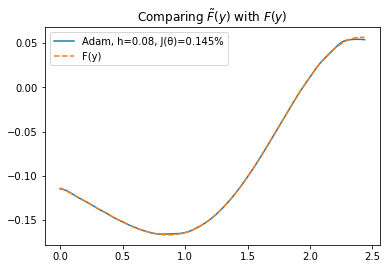

Trainin time: 0:00:28.618410


In [10]:
print(adamOpt.M.j)
train(adamOpt, 6, 8, 0, 500, inp='Q', output='V')

Z: -1.9430325452620676 1.70920484950445 (3, 1000)
t1 -7.233941548536413 4.040106066912656 (1000, 1)
Υ: 0.0007211503165328592 0.9827086458498814 (1000,)


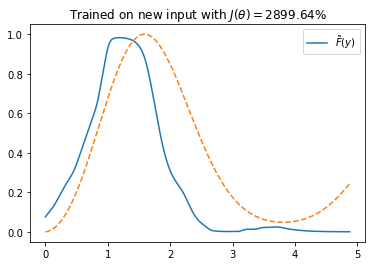

In [11]:
testOnNew(Y0test, Ctest, ttest, adamOpt)

4001


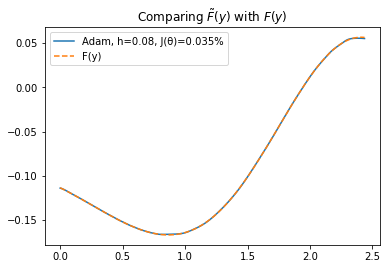

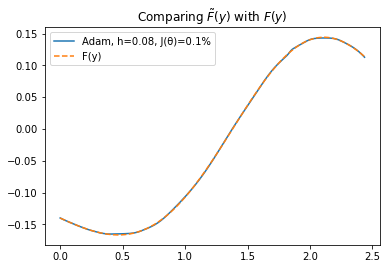

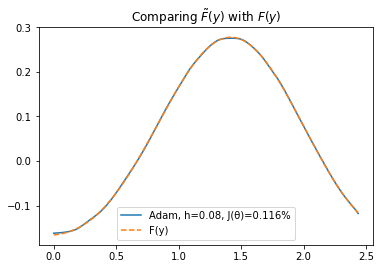

Trainin time: 0:00:28.256020


In [12]:
print(adamOpt.M.j)
train(adamOpt, 8, 10, 0, 500, inp='Q', output='V')

Z: -1.942958980867492 1.7586175325585274 (3, 1000)
t1 -7.9145680142971715 -0.35046412125627935 (1000, 1)
Υ: 0.00036524823879729995 0.4132698774134426 (1000,)


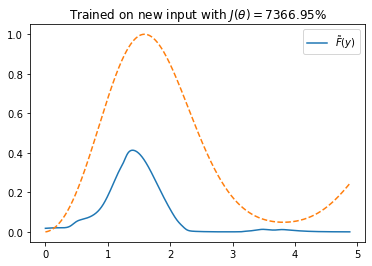

In [13]:
testOnNew(Y0test, Ctest, ttest, adamOpt)

4001


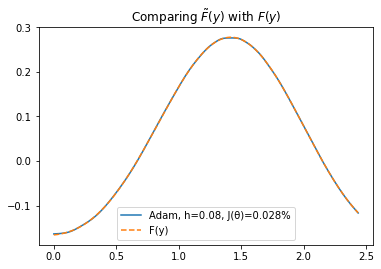

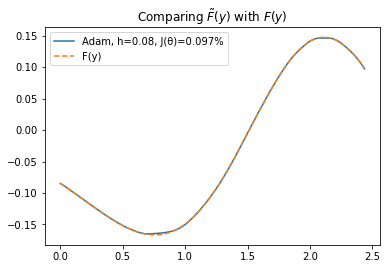

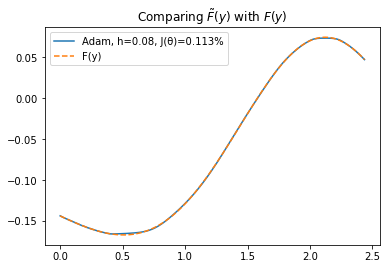

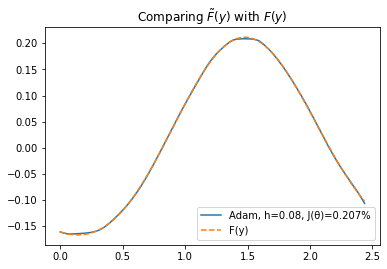

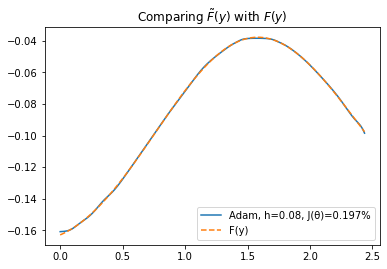

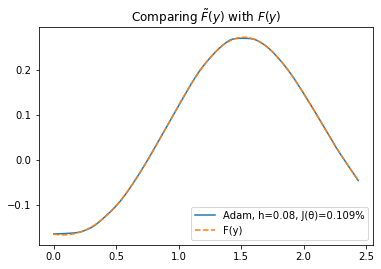

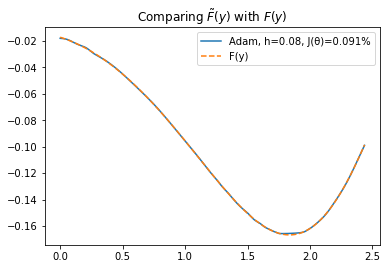

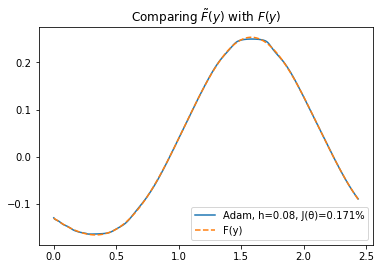

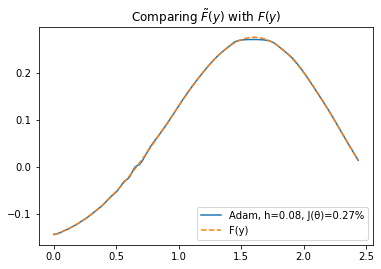

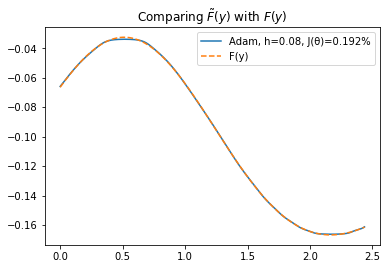

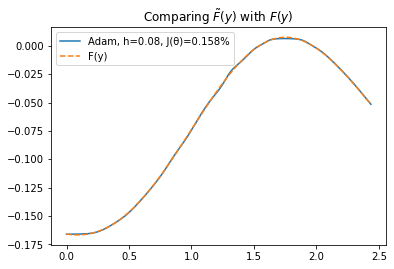

Trainin time: 0:01:35.424055


In [14]:
print(adamOpt.M.j)
train(adamOpt, 10, 20, 0, 500, inp='Q', output='V')

Z: -1.613645668596414 1.7147548348455894 (3, 1000)
t1 -4.156905622501626 7.558796856630405 (1000, 1)
Υ: 0.015414598544611968 0.9994787695142717 (1000,)


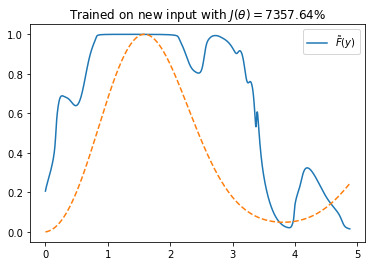

In [15]:
testOnNew(Y0test, Ctest, ttest, adamOpt)